In [1]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Load file csv
df = pd.read_csv("GojekAppReview.csv")

# Ambil kolom
df = df[['content', 'score']].dropna()

# Mapping skor ke label 3 kelas
def map_score(score):
    if score <= 2:
        return "Negatif"
    else:
        return "Positif"

df['label'] = df['score'].apply(map_score)

In [3]:
# Pisahkan fitur dan label
X = df[['content']]
y = df['label']

# Split data 80% data latih, 20% data uji
X_latih, X_tes, y_latih, y_tes = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    text_features=['content'],
    verbose=100,
    loss_function='MultiClass'
)

# Training model
model.fit(X_latih, y_latih, text_features=['content'])

# Prediksi
y_prediksi = model.predict(X_tes)

# Evaluasi
print(classification_report(y_tes, y_prediksi))

0:	learn: 0.6286444	total: 424ms	remaining: 1m 24s
100:	learn: 0.2344694	total: 27.8s	remaining: 27.2s
199:	learn: 0.2276929	total: 52.8s	remaining: 0us
              precision    recall  f1-score   support

     Negatif       0.77      0.87      0.82     10870
     Positif       0.96      0.92      0.94     34130

    accuracy                           0.91     45000
   macro avg       0.86      0.89      0.88     45000
weighted avg       0.91      0.91      0.91     45000



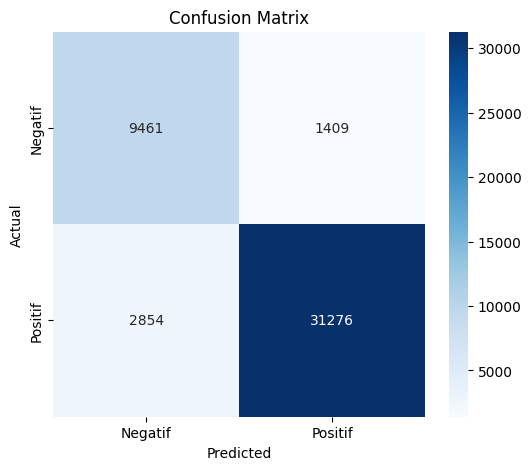

In [8]:
# Confusion matrix
cm = confusion_matrix(y_tes, y_prediksi, labels=["Negatif", "Positif"])

# Visualisasi
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negatif", "Positif"],
            yticklabels=["Negatif", "Positif"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Tampilkan 10 contoh ulasan dari data uji
df_hasil = X_tes.copy()
df_hasil['Label Asli'] = y_tes.values
df_hasil['Prediksi'] = y_prediksi.ravel()

# Tampilkan 10 sampel
print("\nContoh hasil prediksi:")
print(df_hasil.sample(10, random_state=42))


Contoh hasil prediksi:
                                                  content Label Asli Prediksi
167238                                              Bagus    Positif  Positif
78770                                                Good    Positif  Positif
127715                                  Super duper bagus    Positif  Positif
115199                          Keren sering dapet diskon    Positif  Positif
69944                                           Ok banget    Positif  Positif
7467                      Teruskan memberikan pelayananya    Positif  Positif
76154   Entah kurang apa gojek memberikan double order...    Negatif  Negatif
78164   Go mart eror  Bnyak yg ga ada di daftar jdi ha...    Negatif  Negatif
205409                                             Ok lah    Positif  Positif
148169  OIII GOJEK KALAU NGASIH HARGA YANG BENER DONG ...    Negatif  Negatif
